# Expected Data Feature Exploration

Exploratory Data Analysis of features related to expected data. This includes xG (Expected Goals), xA (Expected Assists) and xAG (Expected Assisted Goals)

In [2]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
#load the att_explore dataframe in 
att_explore = pd.read_csv('att_explore.csv')
att_explore.head()

,Unnamed: 0,Player ID,Day,Matchweek,Venue,Result,Team,Opponent,Start,Position,...,kickoff_time,own_goals,saves,selected,threat,total_points,transfers_balance,transfers_in,transfers_out,value
0,10000,140,Sun,32,Away,L 1–2,Crystal Palace,Leicester City,Y,DM,...,2022-04-10 13:00:00+00:00,0,0,6955,36.0,2,27,343,316,54
1,24977,340,Sat,29,Away,L 1–2,Bournemouth,Liverpool,N,LW,...,2020-03-07 12:30:00+00:00,0,0,24392,0.0,1,-359,133,492,52
2,37756,498,Sun,37,Away,D 0–0,Huddersfield,Manchester City,Y,CM,...,2018-05-06 12:30:00+00:00,0,0,10349,0.0,3,-47,129,176,44
3,18759,262,Sun,34,Away,D 2–2,Southampton,Brighton,N,LM,...,2022-04-24 13:00:00+00:00,0,0,19229,5.0,1,-1446,288,1734,58
4,168,3,Sun,38,Home,W 5–0,Manchester City,Norwich City,Y*,LM,...,2020-07-26 15:00:00+00:00,0,0,801163,101.0,3,198047,228466,30419,75


### EDA Functions

In [4]:
def scatter_plot(df, feature1, feature2):
    correlation = df[feature1].corr(df[feature2])
    
    plt.figure()
    plt.scatter(df[feature1], df[feature2], alpha = 0.1)
    plt.title(f'Scatter Plot of {feature1} vs {feature2}')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    
    plt.text(0.1, 0.9, f'Correlation: {correlation:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))

    plt.show()

### xG and npxG Feature Exploration

xG and npxG stand for Expected Goals and Non-Penalty Expected Goals respectively. For each shot that is taken, an xG value is given which classifies the probability of that shot resulting in a goal. For example, a shot with an xG value of 0.8 means that this shot will result in a goal 8 out of 10 times. We expect there to be a strong relationship between both xG and npxG and goals scored. 

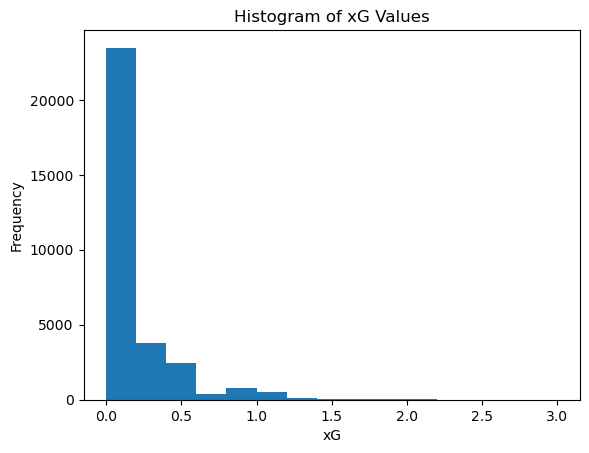

In [5]:
plt.figure()

plt.hist(att_explore['xG'], bins = 15)
plt.title('Histogram of xG Values')
plt.xlabel('xG')
plt.ylabel('Frequency')
plt.show()

We can see that majority of the xG values are situated around the 0 mark. There are also some extreme values of xG going up to 3. 

In [6]:
att_explore['xG'].max()

3.0

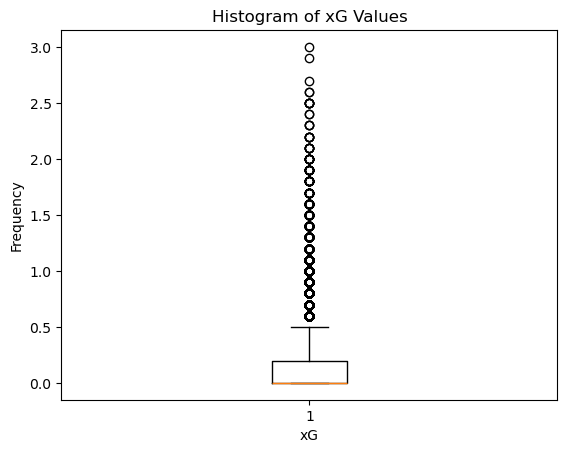

In [7]:
plt.figure()

plt.boxplot(att_explore['xG'])
plt.title('Histogram of xG Values')
plt.xlabel('xG')
plt.ylabel('Frequency')
plt.show()

This boxplot doesn't really give us any additional information about the distribution of the 'xG' feature. We now know that there are a lot of xG values equal to or close to 0. We could try removing these values and replotting to see if we can get a better idea into the distribution of the non-zero xG values.

In [8]:
zero_xg_pct = (att_explore['xG'] == 0).sum()/len(att_explore)*100
zero_xg_pct = round(zero_xg_pct, 2)

print(str(zero_xg_pct) + '% of the observations have xG values equal to zero')

52.21% of the observations have xG values equal to zero


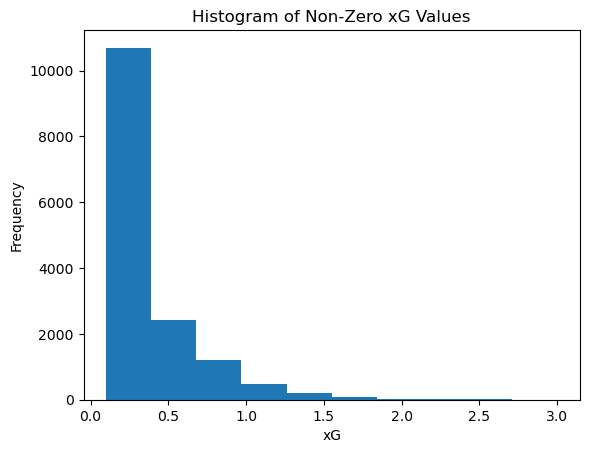

In [9]:
nonzero_xgdat = att_explore[att_explore['xG'] != 0]


plt.figure()

plt.hist(nonzero_xgdat['xG'], bins = 10)
plt.title('Histogram of Non-Zero xG Values')
plt.xlabel('xG')
plt.ylabel('Frequency')
plt.show()

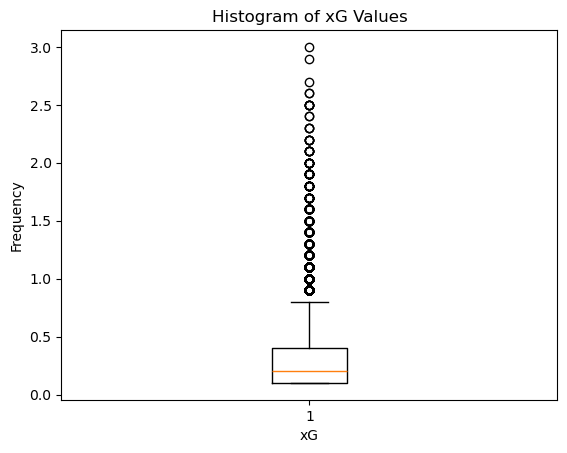

In [10]:
plt.figure()

plt.boxplot(nonzero_xgdat['xG'])
plt.title('Histogram of xG Values')
plt.xlabel('xG')
plt.ylabel('Frequency')
plt.show()

So even when removing all of the observations with xG = 0, we can still see that the xG values are heavily right-skewed. Let's now take a look at the box plots when the non-zero xG observations are sorted by the number of goals scored. 

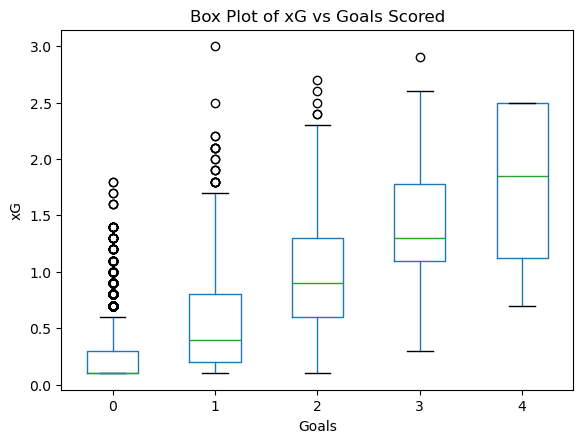

In [11]:
plt.figure
nonzero_xgdat.boxplot(column = 'xG', by = 'Goals', grid = False)
plt.title('Box Plot of xG vs Goals Scored')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('xG')
plt.show()

We can see a very clear pattern showing us that the median value of xG is increasing by the number of goals scored. This gives us reason to believe that xG is an important predictor of Goals. We know based on the how xG is defined that this metric should closely match the number of goals scored. To investigate this, let's calculate the difference between Goals and xG for each observation, and visualise the resulting array. 

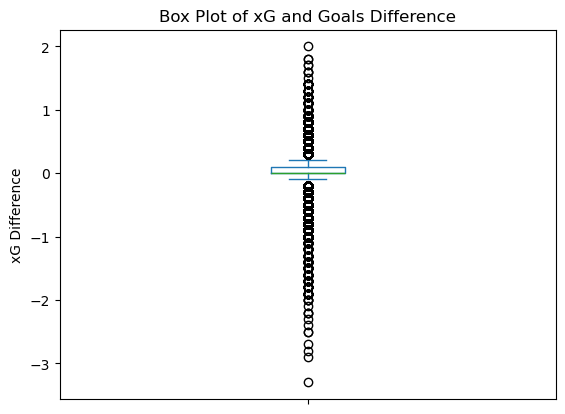

In [12]:
xg_diff = att_explore['xG'] - att_explore['Goals']

xg_diff.plot(kind = 'box')
plt.title('Box Plot of xG and Goals Difference')
plt.suptitle('')
plt.ylabel('xG Difference')
plt.show()

The object xg_diff was computed by taking the difference of xG and Goals for each observation. We can see that the median xg_diff value is close to zero. This makes sense because this means that on average, a player with an xG of 1 will score 1 goal etc. There are some outliers, and it appears that there are more negative outliers than positive outliers. What this means is that the frequency of observations with a negative xg_diff (the number of goals scored being greater than the xG) is greater than the frequency of observations with a positive xg_diff (number of goals scored < xG). 

Another thing we can take a look at is the relationship between xG and Shots/SOT. 

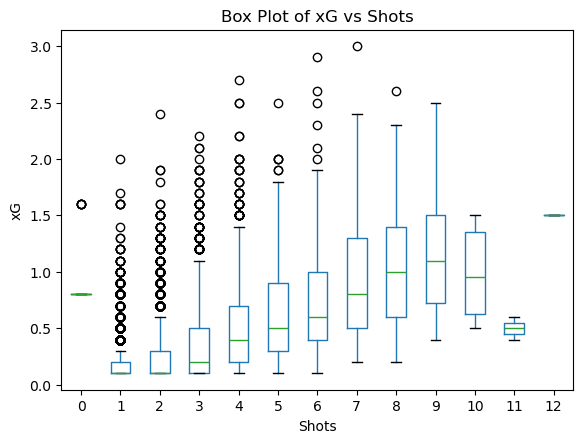

In [13]:
plt.figure
nonzero_xgdat.boxplot(column = 'xG', by = 'Shots', grid = False)
plt.title('Box Plot of xG vs Shots')
plt.suptitle('')
plt.xlabel('Shots')
plt.ylabel('xG')
plt.show()

As expected, the general pattern is increasing median values for xG as the number of shots increase. For some reason, the boxplot for the observations with 0 shots is a bit weird. Upon further investigation, we remember that penalties are not recorded as shots. However, each penalty has an xG value of 0.79, which is why the median xG for the observations with 0 shots is at that number (remember that this plot only has observations with non-zero xG)

Let's now have a look at the relationship between xG and npxG. Since they record very similar things, we want to have a look at which feature provides us with more information. 

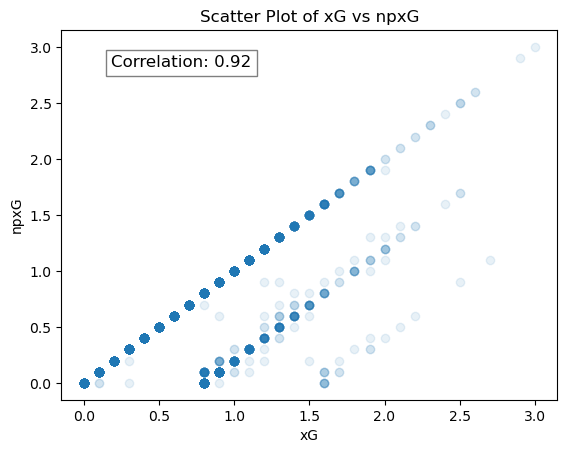

In [19]:
scatter_plot(att_explore ,'xG', 'npxG')

There are a few things to note. The first is that we see a large number of observations where xG = npxG (these are the observations that lie on the y = x line). In other words, these are the observations that do not contain any penalties being taken, as their xG is equal to their xG excluding penalties (npxG). We can also notice that there are no observations that lie above the y=x line. In other words, there are no observations where the npxG is greater than the xG. This also makes sense. 

It is also of note that xG and npxG are highly correlated with each other. This means there is justification to perhaps remove one of these features, as they basically communicate the same information. Based on contextual information, it makes more sense to keep the npxG metric, whilst removing xG. This is because npxG is less noisy, because it excludes any penalty involvements, which are generally considered to be unpredictable. In other words, npxG is a metric that better represents the baseline goal threat of a player. 

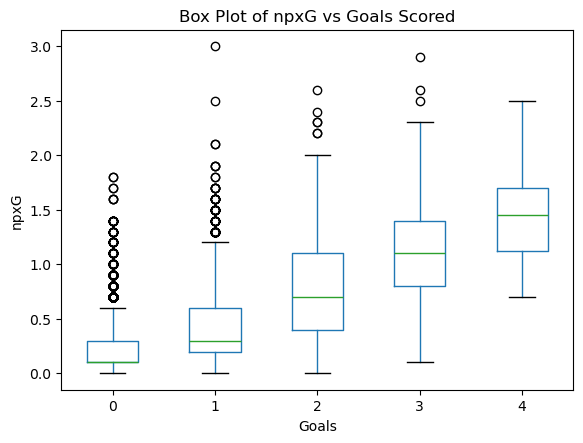

In [15]:
plt.figure
nonzero_xgdat.boxplot(column = 'npxG', by = 'Goals', grid = False)
plt.title('Box Plot of npxG vs Goals Scored')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('npxG')
plt.show()

We can see that the relationship between 'Goals' and 'npxG' is very similar to the relationship between 'Goals' and 'xG'. The only slight difference that we can see is that the difference in npxG between successive number of goals scored isn't as large. This does make sense, because we are now excluding very large xG shots (penalties) from the metric. With regards to which feature to include, it may be best to include 'npxG' over 'xG', whilst also at the same time including a feature related to penalties (i.e. Penalties Taken). 

### xAG Feature Exploration

xAG is refers to the 'Expected Goals Assisted' for a particular player in a particular match. As this metric is more closely related to chance creation and assists, we don't expect there to be a strong relationship between xAG and Goals. 

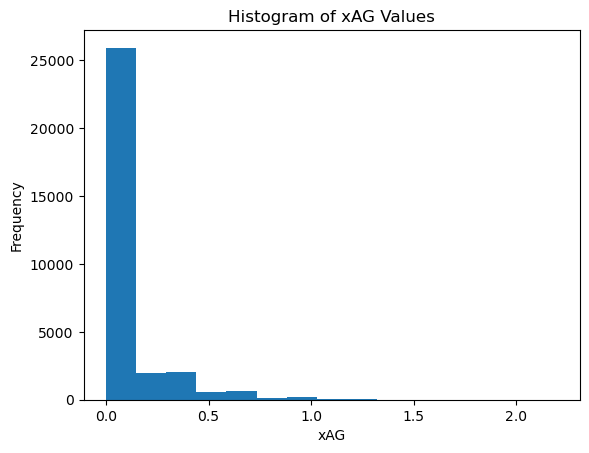

In [16]:
plt.figure()

plt.hist(att_explore['xAG'], bins = 15)
plt.title('Histogram of xAG Values')
plt.xlabel('xAG')
plt.ylabel('Frequency')
plt.show()

So an overwhelming majority of the observations have xAG values equal to zero.

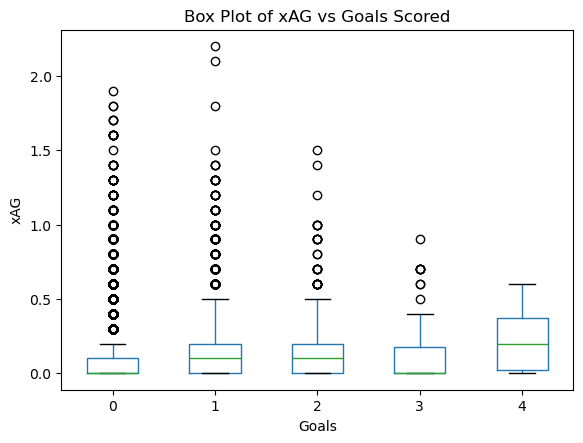

In [17]:
plt.figure
nonzero_xgdat.boxplot(column = 'xAG', by = 'Goals', grid = False)
plt.title('Box Plot of xAG vs Goals Scored')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('xAG')
plt.show()

This box plot shows that the median xAG value doesn't really differ across different goals scored. The median xAG values for observations that have either scored 1 or 2 goals does seem to be slightly higher than the median xAG values for observation that have scored 0 goals, but this is most likely captured by the fact that attacking players are simultaneously more likely to accumulate xAG and to score goals. Instead, we believe that xAG is more likely to be correlated with 'Assists'. 

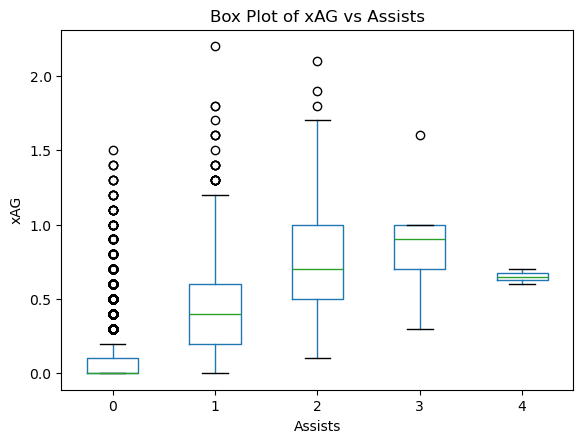

In [18]:
plt.figure
nonzero_xgdat.boxplot(column = 'xAG', by = 'Assists', grid = False)
plt.title('Box Plot of xAG vs Assists')
plt.suptitle('')
plt.xlabel('Assists')
plt.ylabel('xAG')
plt.show()

Here, we see a much clearer relationship between xAG and Assists. There does seem to be an outlier at 4 assists, where the median xAG value for observations with 4 assists is lower than the median xAG value for observations with 2 or 3 assists. However, this is most likely attributed to the small sample size associated with observations with 4 assists in one game. 